In [1]:
import pandas as pd
import numpy as np

Problem 1: Frequentist hypothesis testing

*Null Hypothesis (H0):* There is no significant difference between Version A and Version B in visitor conversion rates.

In [9]:
from statsmodels.stats.proportion import proportions_ztest

conversions = np.array([150, 180])
visitors = np.array([5000, 5000])

z_stat_2, p_val_2 = proportions_ztest(conversions, visitors, alternative='two-sided')

print('Two-tailed z-test')
print('-------------------')
print('z-statistic: ', z_stat_2)
print('p-value: ', p_val_2)

z_stat_1, p_val_1 = proportions_ztest(conversions, visitors, alternative='smaller')
print('\nOne-tailed z-test')
print('-------------------')
print('z-statistic: ', z_stat_1)
print('p-value: ', p_val_1)


Two-tailed z-test
-------------------
z-statistic:  -1.6793880081678563
p-value:  0.09307644886114144

One-tailed z-test
-------------------
z-statistic:  -1.6793880081678563
p-value:  0.04653822443057072


The two-tailed and one-tailed z-statistic share the same value of -1.67, while the p-value for the two-tailed test is double that of the one-tailed test. Based on the z-statistic of 1.67 for the two-tailed z-test, there is no significant difference between the two versions. The critical value for a two-tailed z-test with significance level of 0.05 is 1.96. Because the z-statistic is lower than this critical value, no significant difference can be concluded. Similarly, the p-value is greater than the significance level of 0.05, indicating an acceptance of the null hypothesis. However, the critical value for a one-tailed z-test is 1.645. Given that the z-statistic is higher than this critical value, significant difference between Version A and Version B can be assumed. Additionally, a p-value of 0.046 is lower than the significance level of 0.05, indicating rejection of the null hypothesis and acceptance of the alternative hypothesis.

Problem 2: Bayesian hypothesis testing

In [11]:
from scipy.stats import beta
import matplotlib.pyplot as plt

# using this article to conduct Bayesian A/B testing
# https://patonv.medium.com/bayesian-a-b-testing-in-python-a-step-by-step-walkthrough-ad1bd6358b24

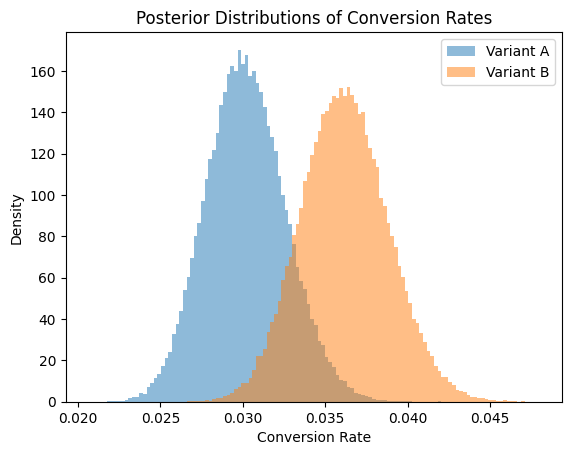

The probability that version B is better than version A:  0.95358


In [16]:
alpha_prior = 1
beta_prior = 1

post_A = beta(alpha_prior + conversions[0], beta_prior + visitors[0] - conversions[0])
post_B = beta(alpha_prior + conversions[1], beta_prior + visitors[1] - conversions[1])

# use mcmc to draw samples
samples = 100000
samples_A = post_A.rvs(samples)
samples_B = post_B.rvs(samples)

plt.hist(samples_A, bins=100, alpha=0.5, label='Variant A', density=True)
plt.hist(samples_B, bins=100, alpha=0.5, label='Variant B', density=True)
plt.title('Posterior Distributions of Conversion Rates')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

print('The probability that version B is better than version A: ', np.mean(samples_B > samples_A))

Problem 3: Logistic Regression (classification)

In [ ]:
# use logistic regression to build a classification model that predicts the target variable based on features in the dataset
# perform 100 fold validation (80/10/10 split)
# accuracy, precision, recall, f1 score
# visualize decision boundary